# *Homework #4*

**Double Click here to edit this cell**
- Name : 한승윤
- Student Id : 201903742
- Submission date : 2023/12/12

**최종 제출 시 모든 셀을 다시 실행한 뒤 제출하세요.**

# RNN Scratch 구현

## Data load & preprocessing

In [1]:
# 해당 셀을 실행하세요.
import os
import random
from string import ascii_letters
from IPython.display import Image
import torch
from torch import nn
import torch.nn.functional as F
from unidecode import unidecode
import matplotlib.pyplot as plt

_ = torch.manual_seed(505)

In [2]:
# 경로를 수정 후 해당 셀을 실행하면 됩니다.

# data 형태를 확인하시길 바랍니다.

data_dir = "./data/names" # data file의 경로를 자신의 경로에 맞게 수정하여 사용

lang2label = {
    name.split(".")[0]: torch.tensor([i], dtype=torch.long)
    for i, name in enumerate(sorted(os.listdir(data_dir)))
} # file 이름을 통해 label을 만들고 dictionary로 만들어주는 과정입니다.

unidecode("Ślusàrski")

char2idx = {letter: i for i, letter in enumerate(ascii_letters + " .,:;-'")}

num_letters = len(char2idx) #input_size
num_langs = len(lang2label) #output_size

## One-hot encoding

- data에 대해 one-hot encoding을 진행합니다.
- 인자로 주어지는 name은 각 언어에 대한 성씨입니다. ex) Kim, Lee, Jang, Cho
- name에 대해 one-hot-encoding을 진행하는 function을 작성하세요.
- pd.get_dummies / sklearn의 library 사용 금지. → 사용시 0점
<br>

Hint : 어휘에는 총 num_letters만큼의 token이 존재합니다.

In [3]:
def name2tensor(name):
    tensor = torch.zeros(len(name), 1, num_letters) #3차원(글자수, 1, 59)
    for i, c in enumerate(name):
        ci = char2idx[c]
        tensor[i][0][ci] = 1
    
    return tensor

In [4]:
# name2tensor를 정의하고 해당 셀을 실행하세요.

tensor_names, target_langs = [], []

for file in sorted(os.listdir(data_dir)):
    with open(os.path.join(data_dir, file)) as f:
        lang = file.split(".")[0] #나라 이름
        names = [unidecode(line.rstrip()) for line in f] #각 나라의 성들
        for name in names:
            try:
                tensor_names.append(name2tensor(name))
                target_langs.append(lang2label[lang])
            except KeyError:
                pass

In [5]:
# 해당 셀을 실행하여 결과를 확인하세요.

print(tensor_names[0])

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

**Your Output must be**
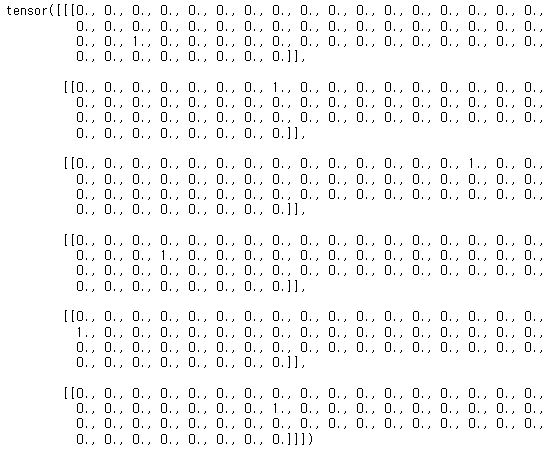


In [6]:
# 해당 셀을 실행하세요.
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(
    range(len(target_langs)),
    test_size=0.1,
    shuffle=True
)

train_dataset = [
    (tensor_names[i], target_langs[i])
    for i in train_idx
]

test_dataset = [
    (tensor_names[i], target_langs[i])
    for i in test_idx
]

In [7]:
print(f"Train: {len(train_dataset)}")
print(f"Test: {len(test_dataset)}")

Train: 18063
Test: 2007


# RNN Model
- RNN 모델을 scratch로 구현합니다.
<br>
- 밑줄친 부분을 지우고 해당 부분에 올바른 코드를 작성하면 됩니다.
<br>

- RNN_Scratch에서 주어진 init, forward 외에 추가를 하면 안됩니다.
<br>

- 올바른 코드를 작성하였다면 하이퍼파라미터 튜닝을 통해 성능을 향상합니다.
<br>

- 하이퍼파라미터를 수정하여 정확도를 비교하는 과정 또한 있어야합니다.
<br>

- Inference 전에 셀을 필요한만큼 추가하여 하이퍼파라미터를 변경해가며 결과값을 비교하면 됩니다.(최소 4회 이상의 코드와 결과를 보여주어야합니다.)
<br>

- num_epochs, print_interval은 2와 3000으로 고정입니다.
<br>

- 학습하며 train_loss의 learning curve를 출력하여야합니다. 해당 부분에 대해서 필요한 코드는 추가하시면 됩니다.
<br>


In [44]:
import torch
import torch.nn as nn

class RNN_Scratch(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_Scratch, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size

        # 입력에서 은닉층으로의 가중치와 편향
        self.wxh = nn.Parameter(torch.randn(self.input_size, self.hidden_size)) #모델의 매개변수 텐서 생성
        self.bh = nn.Parameter(torch.zeros(self.hidden_size))

        # 은닉층에서 출력층으로의 가중치와 편향
        self.wh_output = nn.Parameter(torch.randn(self.hidden_size, self.output_size))
        self.bo = nn.Parameter(torch.zeros(self.output_size))

    def forward(self, x, state = None): #x(단어길이, 배치크기(1), 인코딩크기(59)
        # 은닉 상태 초기화(0으로 초기화)
        if state == None :
            state = torch.zeros(x.shape[0], self.hidden_size) #(배치크기, 은닉층 크기)
        else :
            state = state

        # RNN forward 연산
        for i in range(x.size(0)):
            state = torch.tanh(torch.matmul(x[i], self.wxh)+ state + self.bh) 
            out = torch.matmul(state, self.wh_output) + self.bo 

        return out, state

In [45]:
input_size = num_letters
hidden_size = 128
output_size = num_langs
learning_rate = 0.001

model = RNN_Scratch(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [46]:
num_epochs = 2
print_interval = 3000

train_loss = []

for epoch in range(num_epochs):
    random.shuffle(train_dataset)
    for i, (name, label) in enumerate(train_dataset): #성, 나라
        hidden = None # 은닉 상태 0으로 초기화

        for char in name :
            output, hidden = model(char, hidden) #성의 각 단어와 hidden_state

        loss = criterion(output, label) #예측값과 실제값으로 loss 계산
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()

        if (i + 1) % print_interval == 0:
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i + 1}/{len(train_dataset)}], "
                f"Loss: {loss.item():.4f}"
            )
            train_loss.append(loss.item())

Epoch [1/2], Step [3000/18063], Loss: 0.0000
Epoch [1/2], Step [6000/18063], Loss: 0.0000
Epoch [1/2], Step [9000/18063], Loss: 5.2386
Epoch [1/2], Step [12000/18063], Loss: 4.6542
Epoch [1/2], Step [15000/18063], Loss: 0.0010
Epoch [1/2], Step [18000/18063], Loss: 0.2946
Epoch [2/2], Step [3000/18063], Loss: 0.0269
Epoch [2/2], Step [6000/18063], Loss: 12.9278
Epoch [2/2], Step [9000/18063], Loss: 0.0001
Epoch [2/2], Step [12000/18063], Loss: 0.0001
Epoch [2/2], Step [15000/18063], Loss: 4.2071
Epoch [2/2], Step [18000/18063], Loss: 0.0004


# Accuracy

In [11]:
'''
사용한 하이퍼파라미터
input_size = num_letters
hidden_size = 128
output_size = num_langs
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
activation = tanh
'''

num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = torch.zeros(name.shape[1], hidden_size) # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 73.8416%


In [14]:
'''
사용한 하이퍼파라미터
input_size = num_letters
hidden_size = 256
output_size = num_langs
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
activation = tanh
'''

num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = torch.zeros(name.shape[1], hidden_size) # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 74.3896%


In [17]:
'''
사용한 하이퍼파라미터
input_size = num_letters
hidden_size = 256
output_size = num_langs
learning_rate = 0.0005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
activation = tanh
'''

num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = torch.zeros(name.shape[1], hidden_size) # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 72.7454%


In [22]:
'''
사용한 하이퍼파라미터
input_size = num_letters
hidden_size = 256
output_size = num_langs
learning_rate = 0.0005
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
activation = tanh
'''

num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = torch.zeros(name.shape[1], hidden_size) # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 46.8361%


In [26]:
'''
사용한 하이퍼파라미터
input_size = num_letters
hidden_size = 256
output_size = num_langs
learning_rate = 0.0005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
activation = tanh
'''

num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = torch.zeros(name.shape[1], hidden_size) # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 39.2128%


In [37]:
'''
사용한 하이퍼파라미터
input_size = num_letters
hidden_size = 128
output_size = num_langs
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
activation = sigmoid
'''

num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = torch.zeros(name.shape[1], hidden_size) # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 59.0932%


In [47]:
'''
최종 하이퍼파라미터
input_size = num_letters
hidden_size = 128
output_size = num_langs
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
activation = tanh
'''

num_correct = 0
num_samples = len(test_dataset)

model.eval()

with torch.no_grad():
    for name, label in test_dataset:
        hidden_state = torch.zeros(name.shape[1], hidden_size) # 은닉 상태 0으로 초기화
        for char in name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
        num_correct += bool(pred == label)

print(f"Accuracy: {num_correct / num_samples * 100:.4f}%")

Accuracy: 72.8949%


# Learning curve

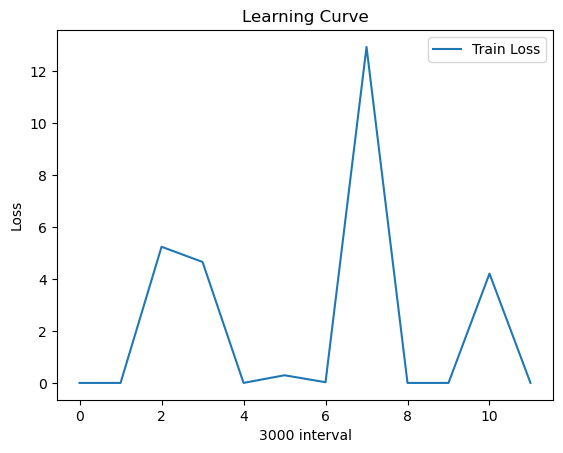

In [48]:
'''
사용한 하이퍼파라미터
input_size = num_letters
hidden_size = 128
output_size = num_langs
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
'''

plt.plot(train_loss, label='Train Loss')
plt.xlabel('3000 interval')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Inference

In [50]:
# 해당 셀을 실행하세요.

label2lang = {label.item(): lang for lang, label in lang2label.items()}

def myrnn_predict(name):
    model.eval()
    tensor_name = name2tensor(name)
    with torch.no_grad():
        hidden_state = None # 은닉 상태 0으로 초기화
        for char in tensor_name:
            output, hidden_state = model(char, hidden_state)
        _, pred = torch.max(output, dim=1)
    model.train()
    return label2lang[pred.item()]

### myrnn_predict를 활용하여 5개의 예시를 본인이 만들어 결과 확인하기
- 아래에 예시를 본인이 생각하여 5가지 정도 만들어 예측 결과를 출력하시오.

In [52]:
myrnn_predict('Han')

'Arabic'

In [53]:
myrnn_predict('Jang')

'Chinese'

In [54]:
myrnn_predict('Cho')

'Korean'

In [55]:
myrnn_predict('Smith')

'English'

In [56]:
myrnn_predict('Oh')

'Japanese'

## 참조
- one-hot encoding : https://jaketae.github.io/study/pytorch-rnn/ 
- RNN_Scratch: https://d2l.ai/chapter_recurrent-neural-networks/rnn-scratch.html